# Refer to the supplementary Manual about details for each line of the code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\Nikita\\purshotam sir machine learning\\Deep Learning'

## Create the Convolutional Neural Network

In [4]:
# model=Sequential()
# model=Sequential()

In [5]:
?Conv2D

In [6]:
def new(n,p,f,s):
    return ((n+2*p-f)/s)+1

In [7]:
new(126,0,3,1)

124.0

In [8]:
model=Sequential()

model.add(Conv2D(filters=10,kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))

model.add(Conv2D(filters=10,kernel_size=3,activation='relu')) # (126X126X10)
model.add(Conv2D(filters=20,kernel_size=3,activation='relu')) #(124X124X10)
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(filters=40,kernel_size=3,activation='relu')) 
model.add(Conv2D(filters=80,kernel_size=3,activation='relu')) 

model.add(MaxPooling2D(pool_size=2)) # (54X54X80)

# Flatten Layer
model.add(Flatten()) 

# ANN Layers 

model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
# model.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
# model.add(Dense(units=64,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=32,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=16,activation='relu',kernel_initializer='uniform'))

#Output Layers

model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))  # Output Layers

In [9]:
# model=Sequential()

# model.add(Conv2D(filters=10,kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))

# model.add(Conv2D(filters=10,kernel_size=3,activation='relu')) # (126X126X10)
# model.add(Conv2D(filters=20,kernel_size=3,activation='relu')) #(124X124X10)

# model.add(MaxPooling2D(pool_size=2)) # (118X118X80)

# model.add(Conv2D(filters=40,kernel_size=3,activation='relu')) #(122X122X20)
# model.add(Conv2D(filters=80,kernel_size=3,activation='relu')) #(120X120X40)

# model.add(MaxPooling2D(pool_size=2)) # (118X118X80)

# # 59X59X80

# # Flatten Layer
# model.add(Flatten()) 

# # ANN Layers 

# # model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
# # model.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
# model.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
# # model.add(Dense(units=64,activation='relu',kernel_initializer='uniform'))
# model.add(Dense(units=32,activation='relu',kernel_initializer='uniform'))
# model.add(Dense(units=16,activation='relu',kernel_initializer='uniform'))

# #Output Layers

# model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))  # Output Layers

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 10)      280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 20)      1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 40)        7240      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 57, 80)        28880     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 80)       

In [11]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

### Summary of the overall Network (CNN+ANN)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 10)      280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 20)      1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 40)        7240      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 57, 80)        28880     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 80)       

# Image Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [14]:
# help(ImageDataGenerator) 

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [16]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

### Set the Directory

#### "YOUR FILE PATH" is the local path of your machine where you have set up your folders for training and test sets.

In [17]:
train_set = train_datagen.flow_from_directory (
    r"C:\Users\Nikita\Downloads\Cat_dog\training_set",\
    target_size=(128, 128),\
    batch_size=32,\
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory(
    r"C:\Users\Nikita\Downloads\Cat_dog\test_set",\
        target_size=(128, 128),\
        batch_size=32,\
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [19]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [20]:
# help(train_set)

## Fit the Model

In [21]:
hist=model.fit_generator(
        train_set,
        epochs=5,
        validation_data=test_set)

Epoch 1/5
63/63 [==============================] - 67s 1s/step - loss: 0.6934 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.4710
Epoch 2/5
63/63 [==============================] - 56s 895ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
63/63 [==============================] - 54s 861ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
63/63 [==============================] - 56s 889ms/step - loss: 0.6932 - accuracy: 0.4930 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
63/63 [==============================] - 70s 1s/step - loss: 0.6932 - accuracy: 0.4810 - val_loss: 0.6932 - val_accuracy: 0.5000


In [22]:
hist.history   # loss and accuracy is of test and val loss and  accuracy is of train 

{'val_loss': [0.693110466003418,
  0.6931477785110474,
  0.6931471824645996,
  0.6931476593017578,
  0.6931766271591187],
 'val_accuracy': [0.47099998593330383, 0.5, 0.5, 0.5, 0.5],
 'loss': [0.6933927779197693,
  0.6931980218887329,
  0.6931548385620118,
  0.6932285232543945,
  0.693178505897522],
 'accuracy': [0.485, 0.5005, 0.496, 0.493, 0.481]}

In [23]:
dir(hist)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [24]:
hist.history["val_loss"]

[0.693110466003418,
 0.6931477785110474,
 0.6931471824645996,
 0.6931476593017578,
 0.6931766271591187]

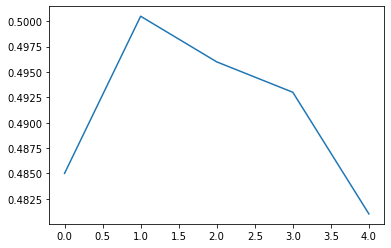

In [25]:
plt.plot(hist.history["accuracy"])

In [26]:
hist.history["val_accuracy"]

[0.47099998593330383, 0.5, 0.5, 0.5, 0.5]

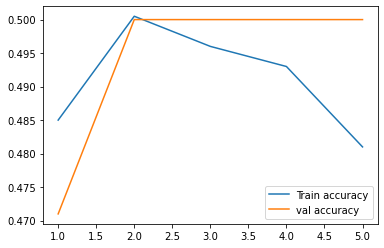

In [27]:
plt.plot(range(1,6),hist.history["accuracy"], label="Train accuracy")



plt.plot(range(1,6),hist.history["val_accuracy"] , label="val accuracy")
plt.legend()

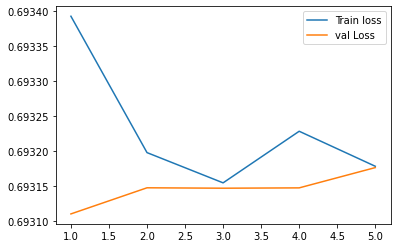

In [28]:
plt.plot(range(1,6),hist.history["loss"], label="Train loss")
plt.plot(range(1,6),hist.history["val_loss"], label="val Loss")
plt.legend()

In [29]:
model.predict(test_set)

array([[0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.499941],
       [0.49

In [30]:
np.where(model.predict(test_set)>=.5,"dog", "cat")

array([['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       [

## Predicting a New Image

In [31]:
import numpy as np
from keras.preprocessing import image

#### Target size is 64x64 as out CNN inputs the image size as 64x64

In [32]:
new_image=image.load_img (r"C:\Users\Nikita\Downloads\Cat_dog\test_set\cats\cat.2002.jpg",target_size=(128,128))

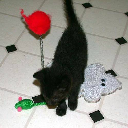

In [33]:
new_image

### Change the image to  numpy array

In [34]:
new_image=image.img_to_array(new_image)

In [35]:
new_image

array([[[106., 108.,  87.],
        [119., 121., 100.],
        [127., 129., 108.],
        ...,
        [117., 119., 105.],
        [112., 119., 103.],
        [117., 118., 102.]],

       [[121., 122., 108.],
        [124., 125., 111.],
        [119., 120., 106.],
        ...,
        [117., 119., 105.],
        [112., 119., 103.],
        [115., 116., 102.]],

       [[122., 122., 112.],
        [130., 130., 120.],
        [129., 129., 119.],
        ...,
        [119., 121., 107.],
        [117., 124., 108.],
        [119., 119., 107.]],

       ...,

       [[237., 231., 231.],
        [240., 236., 235.],
        [240., 239., 237.],
        ...,
        [198., 192., 192.],
        [214., 208., 208.],
        [218., 198., 197.]],

       [[245., 236., 237.],
        [251., 245., 245.],
        [242., 238., 237.],
        ...,
        [230., 224., 226.],
        [229., 223., 225.],
        [223., 207., 208.]],

       [[248., 240., 238.],
        [247., 242., 239.],
        [243., 2

In [36]:
new_image.shape

(128, 128, 3)

In [37]:
type(new_image)

numpy.ndarray

### The input needs to be in 4 dimesnion. 4th Dim represents the batch size so add one more dimesion using the expand_dims function.

In [38]:
new_image=np.expand_dims(new_image,axis=0)

In [39]:
new_image.shape

(1, 128, 128, 3)

#### Predict the image and store it in a variable

In [40]:
result=model.predict(new_image)

In [41]:
result

array([[0.4966887]], dtype=float32)

In [42]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [43]:
result.ndim

2

In [44]:
model.predict(new_image)  # Probaba

array([[0.4966887]], dtype=float32)

In [45]:
result[0][0]

0.4966887

In [46]:
result=model.predict(new_image)
if result[0][0]==1:
    predict=print('This is a Dog')
else:
    predict=print('This is a Cat')

This is a Cat
